In [1]:
import os
import numpy as np
from matplotlib import image
from matplotlib import pyplot
import zipfile  # This is the missing import


In [2]:
# Set the path to your dataset folder and the zip file
dataset_path = "D:/biometric/"  # Adjust path to your dataset folder
zip_path = "D:/biometric/Tr0.zip"  # Path to your Tr0.zip file
images_folder = "Tr0"  # Folder name inside the zip file (to be extracted)
npy_data_path = "D:/biometric/"  # Path to save the .npy files (where yaleExtB_data.npy will be saved)

In [3]:
# Check if the 'Tr0' folder exists, and if not, unzip the zip file
if not os.path.exists(os.path.join(dataset_path, images_folder)):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(dataset_path)  # Extract all files from the zip file to the dataset path
    print(f"Extracted '{zip_path}' to '{dataset_path}'")
else:
    print(f"'{images_folder}' folder already exists. Skipping extraction.")

'Tr0' folder already exists. Skipping extraction.


In [4]:
images_folder_path = os.path.join(dataset_path, images_folder)


Unzip the images:

In [5]:
# Create a list of all image files in the 'Tr0' folder
from os import listdir
fls = listdir(images_folder_path)  # List all image files in the folder
n = len(fls)  # Number of images
print(f'Number of images: {n}')

Number of images: 1500


(77, 68)


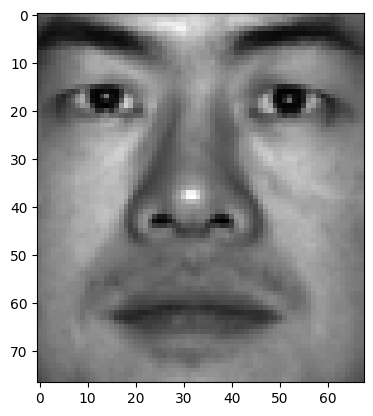

In [6]:
# Load and display the first image to check
im1 = image.imread(os.path.join(images_folder_path, fls[0]))  # Load the first image
print(im1.shape)  # Print the shape of the image (height, width)
pyplot.imshow(im1, cmap=pyplot.cm.gray)  # Display the image
pyplot.show()

Make a list of all images in the directory.

In [7]:
# Process the images and create data for the ANN
m = im1.shape[0] * im1.shape[1]  # Flatten the image size: height * width = number of pixels
images_data = np.zeros((n, m))  # Create an array to store image data
images_target = np.zeros((n,))  # Create an array for targets (class labels)

# Loop through all images and process them
for i in range(n):
    filename = fls[i]  # Get the filename
    img = image.imread(os.path.join(images_folder_path, filename))  # Read the image
    images_data[i] = np.ravel(img)  # Flatten the image into a 1D array and store it in images_data
    c = int(filename[5:7])  # Extract the class label from the filename (e.g., 's01', 's02', etc.)
    images_target[i] = c  # Store the class label in images_target

    if i % 100 == 0:  # Print progress every 100 images
        print(f"Processed {i}/{n} images")


Processed 0/1500 images
Processed 100/1500 images
Processed 200/1500 images
Processed 300/1500 images
Processed 400/1500 images
Processed 500/1500 images
Processed 600/1500 images
Processed 700/1500 images
Processed 800/1500 images
Processed 900/1500 images
Processed 1000/1500 images
Processed 1100/1500 images
Processed 1200/1500 images
Processed 1300/1500 images
Processed 1400/1500 images


In [8]:
# Save the processed data as .npy files
npy_data_file = os.path.join(npy_data_path, "yaleExtB_data.npy")
npy_target_file = os.path.join(npy_data_path, "yaleExtB_target.npy")

 Load and display 1st image using Matplotlib

In [9]:
np.save(npy_data_file, images_data)  # Save the image data
np.save(npy_target_file, images_target)  # Save the image labels

Create the data and target for training an ANN. The data will be a matrix of n=1500 rows and h*w columns, where n is the number of images, h=77 and w=68 are the height and width of an image in pixels. The target will be a nx1 matrix.

In [10]:
print(f"Data saved to: {npy_data_file}")
print(f"Target labels saved to: {npy_target_file}")


Data saved to: D:/biometric/yaleExtB_data.npy
Target labels saved to: D:/biometric/yaleExtB_target.npy


In [11]:
# Verify saved data
print("Images data and target labels:")
print(f"Data shape: {images_data.shape}")
print(f"Target shape: {images_target.shape}")

Images data and target labels:
Data shape: (1500, 5236)
Target shape: (1500,)


In [12]:
print("Files in the dataset directory:", os.listdir(dataset_path))


Files in the dataset directory: ['app.py', 'Copy of classify_yale-v2 (1).ipynb', 'process_yale_images (1).ipynb', 'Tr0', 'Tr0.zip', 'yaleExtB_data.npy', 'yaleExtB_target.npy']


Save the data and target on Google drive as .npy files.